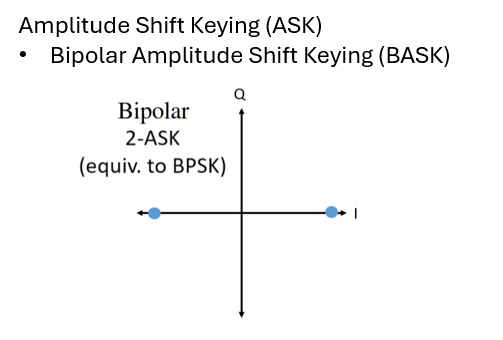

# **BASK**

# 0. Librerie e parametri iniziali

In [ ]:
"""
Created on: Sun Nov 17 13:58:50 2024
Last modified: Tue Nov 26 13:36 2024
@author: giovanni bolla
"""
# from IPython import get_ipython
# from IPython.display import display
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import time


plt.close('all')

In [ ]:

### Parametri
Eb_N0_dB = np.arange(0, 21, 2)  # da 0 a 20 con passo di 2 = 11 elementi che esprimono il contrasto di energia in dB
print(Eb_N0_dB)

Eb_N0 = 10 ** (Eb_N0_dB / 10)   # Conversione in scala lineare = 11 elementi
print(Eb_N0)

N0 = 1                          # Valore di N0
Eb = N0 * Eb_N0                 # Energia del bit = 11 elementi
T = 1                           # Periodo
A = np.sqrt(Eb / T)             # Ampiezza del segnale = 11 elementi
K = int(1e5)                    # Numero di campioni = 100mila
soglia = 0.5                    # Soglia di decisione

# Inizializzazione vettore P(e)
P_e = np.zeros(len(Eb_N0))      # Probabilità di errore = 11 elementi


[ 0  2  4  6  8 10 12 14 16 18 20]
[  1.           1.58489319   2.51188643   3.98107171   6.30957344
  10.          15.84893192  25.11886432  39.81071706  63.09573445
 100.        ]


# 1. Costellazione


In [ ]:
### Costellazione
b_seq = np.random.rand(int(K)) > soglia  # genera 100mila numeri casuali uniformemente distribuiti tra 0 e 1
xi_seq = (-1) ** b_seq                   # Mappatura BPSK:  0-->1    1-->-1
noise = np.sqrt(N0 / 2) * np.random.randn(int(K))  # Rumore gaussiano
print(b_seq)
print(xi_seq)
print(noise)

[ True False False ...  True  True  True]
[-1  1  1 ... -1 -1 -1]
[-0.01058843  0.81274917  1.63364873 ...  0.53133224 -0.48063859
 -0.99061003]


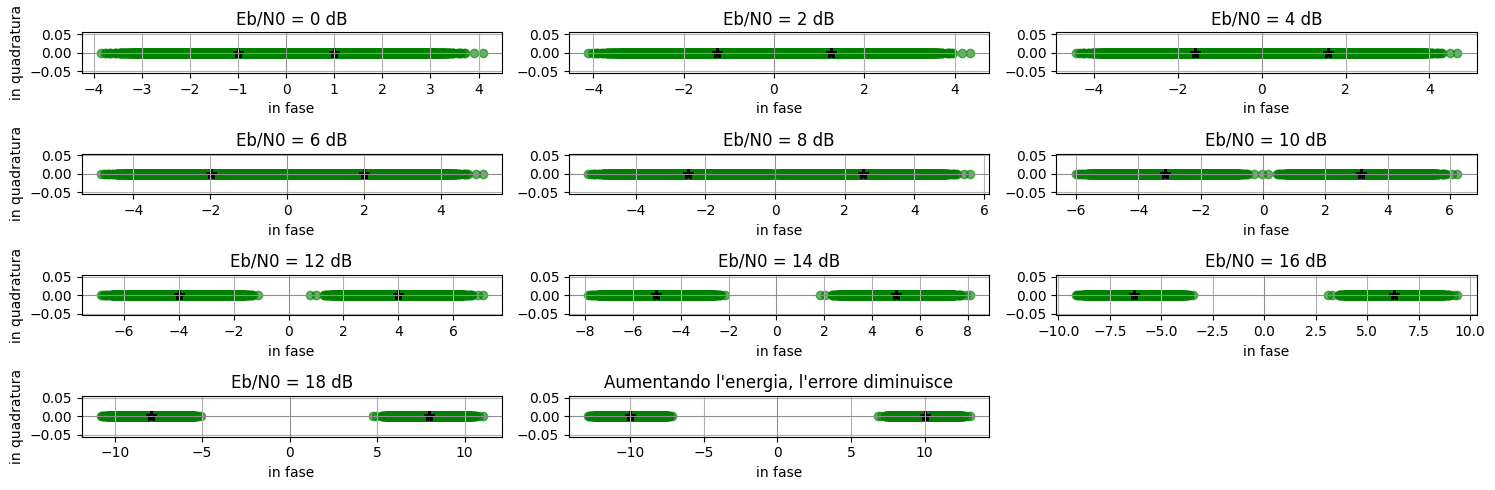

In [ ]:

### Configurazione del subplot
num_subplots = len(Eb_N0_dB) # 11 subpolt
cols = 3  # Numero di colonne nei subplot
rows = int(np.ceil(num_subplots / cols))  # Numero di righe necessario

# Creazione dei subplot
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
axes = axes.flatten()  # Per accedere agli assi in un array 1D


### Plot
#per ciascuno degli 11 Eb_N0, genera 1 segnale da 100mila bit
for p in range(len(Eb_N0)):

    sig = A[p] * np.sqrt(T) * xi_seq  # Segnale trasmesso = 100mila elementi (la dipendenza da Eb_N0 sta nella A)
    sig_rx = sig + noise              # Segnale ricevuto = 100mila elementi: ciascun bit è stato affetto da un AWGN

    # Scatter plot nel subplot corrispondente
    ax = axes[p]
    ax.scatter(sig_rx, np.zeros_like(sig_rx), color='green', label='Ricevuto', alpha=0.6)
    ax.scatter(sig, np.zeros_like(sig), color='black', marker='*', label='Trasmettitore')
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.axvline(0, color='gray', linewidth=0.5)
    ax.set_title(f'Eb/N0 = {Eb_N0_dB[p]} dB')
    ax.set_xlabel('in Fase')
    ax.grid(True)
    if p % cols == 0:  # Solo la prima colonna mostra l'etichetta dell'asse y
        ax.set_ylabel('in Quadratura')

# Rimuovere assi vuoti se il numero di subplot è maggiore dei dati
for i in range(len(Eb_N0), len(axes)):
    fig.delaxes(axes[i])

# Layout e visualizzazione
plt.tight_layout()

# Aumentando l'energia, l'errore diminuisce

Aumentando l'energia, l'errore diminuisce

# 2. Simulazione Monte-Carlo


The time of execution of above program is : 14455.713510513306ms


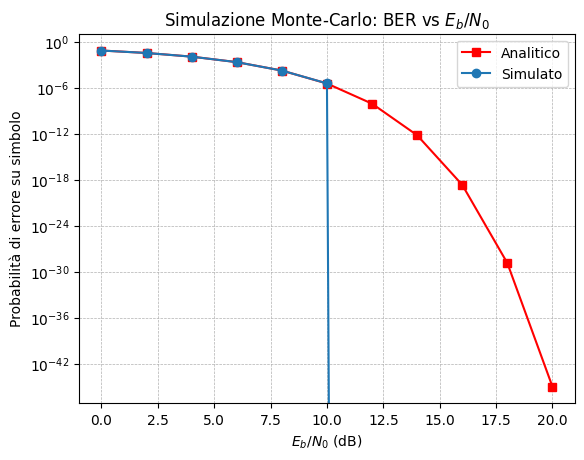

In [ ]:

# Parametri
P_e = np.zeros(len(Eb_N0))  # Inizializzazione della probabilità di errore a 0 = 11 elementi
num_prove = int(1e2)            # Numero di prove = 100

# record start time
start = time.time()


# Simulazione Monte-Carlo
# testa 100 volte la rice-trasmissione per ognuno degli 11 Eb_N0
for num in range(int(num_prove)):
    for p in range(len(Eb_N0)):

        # Trasmettitore
        b_seq = (np.random.rand(int(K)) > soglia)  # Genera sequenza binaria da 100mila bit
        xi_seq = (-1) ** b_seq                           # Mappatura BPSK
        sig = A[p] * np.sqrt(T) * xi_seq                 # Segnale trasmesso: 1 segnale lungo 100mila

        # AWGN (Additive White Gaussian Noise)
        noise = np.sqrt(N0 / 2) * np.random.randn(int(K))  # Rumore gaussiano
        sig_rx = sig + noise                               # Segnale ricevuto

        # Ricevitore
        b_seq_hat = sig_rx < 0                            # Decisione del ricevitore

        # Calcolo della probabilità d'errore sul bit (BER)
        P_e[p] += np.sum(b_seq != b_seq_hat) / K # Memorizzo il BER per ogni Eb_N0
        #es) alla 100esima prova, P_e[0] conterrà la somma di 100 BER ottenute dalle simulazioni ad 1dB



# Calcolo BER medio su tutte le 100 prove
P_e = P_e / num_prove # Divido ciascun elemento di P_e[] per 100
#così avrò 11 elementi che rappresentano la BER media su 100 prove per quella specifica Eb_N0
#es) in P_e[10] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=100 cioè 20dB
#es) in P_e[5] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=10 cioè 10dB


# Calcolo della probabilità teorica
P_e_theoretical = 0.5 * erfc(np.sqrt(Eb / N0))


# record end time
end = time.time()





# print the difference between start and end time in milli. secs
print(f"The time of execution of above program is : {(end-start) * 10**3}ms")

# Plot dei risultati
plt.figure()
plt.semilogy(Eb_N0_dB, P_e_theoretical, '-sr', label='Analitico')  # Risultati teorici
plt.semilogy(Eb_N0_dB, P_e, '-o', label='Simulato')  # Risultati simulati
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('Probabilità di errore su simbolo') # in questo caso simbolo=bit
plt.legend()
plt.title('Simulazione Monte-Carlo: BER vs $E_b/N_0$')
plt.show()

# La simulazione si interrompe perché non riesce più a trovare errori: numero di prove insufficiente
#The time of execution of above program is : 14455.713510513306ms

## 2.1 Simulazione Monte Carlo con calcoli paralleli

In [ ]:
import threading
!pip install multiprocess

from multiprocess import Array

# Parametri
P_e = np.zeros(len(Eb_N0))  # Inizializzazione della probabilità di errore a 0 = 11 elementi
num_prove = int(1e2)            # Numero di prove = 100
arr = Array('d', [0] * len(Eb_N0))


The time of execution of above program is : 10492.344856262207ms


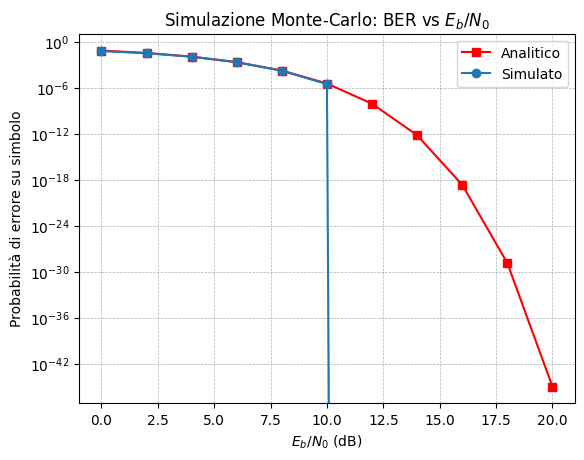

In [ ]:


def simulate_rice_transmission(temp):
  #11 contrasti di energia
  for p in range(len(Eb_N0)):

      # Trasmettitore
      b_seq = (np.random.rand(int(K)) - 0.5 > soglia)  # Genera sequenza binaria da 100mila bit
      xi_seq = (-1) ** b_seq                          # Mappatura BPSK
      sig = A[p] * np.sqrt(T) * xi_seq                # Segnale trasmesso: 1 segnale lungo 100mila

      # AWGN (Additive White Gaussian Noise)
      noise = np.sqrt(N0 / 2) * np.random.randn(int(K))  # Rumore gaussiano
      sig_rx = sig + noise                               # Segnale ricevuto

      # Ricevitore
      b_seq_hat = sig_rx < 0                            # Decisione del ricevitore

      # Calcolo della probabilità d'errore sul bit (BER)
      temp[p] += np.sum(b_seq != b_seq_hat) / K # Memorizzo il BER per ogni Eb_N0
      #es) alla 100esima prova, P_e[0] conterrà la somma di 100 BER ottenute dalle simulazioni ad 1dB


# record start time
start = time.time()


# Simulazione Monte-Carlo
# testa 100 volte la rice-trasmissione per ognuno degli 11 Eb_N0
for num in range(int(num_prove)):
  #avvia 100 thread
  t1 = threading.Thread(target=simulate_rice_transmission, args=(arr,))
  t1.start()


for num in range(int(num_prove)):
  #attendi la terminazione di 100 thread
  t1.join()


# Calcolo BER medio su tutte le 100 prove
P_e = np.frombuffer(arr.get_obj(), dtype=np.float64) / num_prove # Divido ciascun elemento della SHM arr[] per 100
#così avrò 11 elementi che rappresentano la BER media su 100 prove per quella specifica Eb_N0
#es) in P_e[10] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=100 cioè 20dB
#es) in P_e[5] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=10 cioè 10dB


# Calcolo della probabilità teorica
P_e_theoretical = 0.5 * erfc(np.sqrt(Eb / N0))


# record end time
end = time.time()






# print the difference between start and end time in milli. secs
print(f"The time of execution of above program is : {(end-start) * 10**3}ms")

# Plot dei risultati
plt.figure()
plt.semilogy(Eb_N0_dB, P_e_theoretical, '-sr', label='Analitico')  # Risultati teorici
plt.semilogy(Eb_N0_dB, P_e, '-o', label='Simulato')  # Risultati simulati
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('Probabilità di errore su simbolo') # in questo caso simbolo=bit
plt.legend()
plt.title('Simulazione Monte-Carlo: BER vs $E_b/N_0$')
plt.show()

# La simulazione si interrompe perché non riesce più a trovare errori: numero di prove insufficiente
#The time of execution of above program is : 10492.344856262207ms

link utili:


*   Documentazione Shared Memory Array della libreria multiprocessing: https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Array
*   Thread della libreria threading: https://www.geeksforgeeks.org/multithreading-python-set-1/



# 3. Confronto tra modulazione antipodale e ortogonale


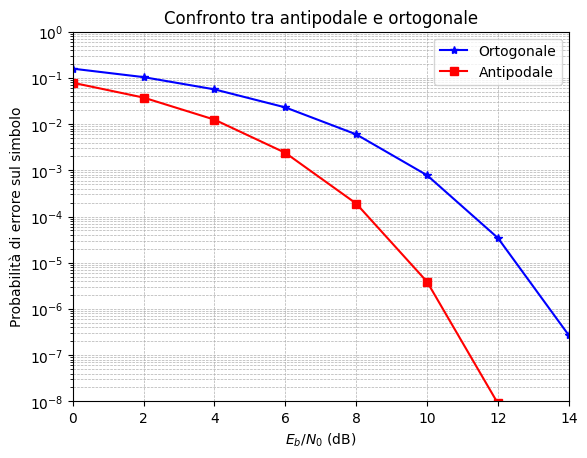

In [ ]:

### Calcolo delle probabilità di errore
P_e_ortogonale = 0.5 * erfc(np.sqrt(Eb / (2 * N0)))  # BER per confronto ortogonale
P_e_antipodale = 0.5 * erfc(np.sqrt(Eb / N0))        # BER per confronto antipodale

### Grafico
plt.figure()
plt.semilogy(Eb_N0_dB, P_e_ortogonale, '-*b', label='Ortogonale')  # Probabilità ortogonale
plt.semilogy(Eb_N0_dB, P_e_antipodale, '-sr', label='Antipodale')  # Probabilità antipodale: Cambia solo il rad2: È quello responsabile dei 3db di scarto
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axis([0, 14, 1e-8, 1])  # Limiti degli assi
plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('Probabilità di errore sul simbolo')
plt.legend()
plt.title('Confronto tra antipodale e ortogonale')
plt.show()

# A parità di energia l’ortogonale perde rispetto l’antipodale: spendo in più circa 3db

A parità di energia l’ortogonale perde rispetto l’antipodale: spendo in più circa 3db

# 4. Decisore con Intelligenza Artificiale: DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
### preparazione dei dati per l'addestramento della rete

### Costellazione
b_seq = np.random.rand(int(K)) > soglia  # genera 100mila numeri casuali uniformemente distribuiti tra 0 e 1
xi_seq = (-1) ** b_seq                   # Mappatura BPSK:  0-->1    1-->-1
noise = np.sqrt(N0 / 2) * np.random.randn(int(K))  # Rumore gaussiano

print(b_seq.shape)
print(b_seq)
print(xi_seq.shape)
print(xi_seq)

### Addestramento

# for p in range(len(Eb_N0)):

sig = A[10] * np.sqrt(T) * xi_seq  # Segnale trasmesso = 100mila elementi (la dipendenza da Eb_N0 sta nella A)
sig_rx = sig + noise              # Segnale ricevuto = 100mila elementi: ciascun bit è stato affetto da un AWGN


### Addestramento della rete

# dati di input
X = sig_rx.reshape(100000, -1)

# dati che vorrei che il modello imparasse a dare in output
Y = b_seq.reshape(100000, -1)

# training della rete
model.fit(X,Y)


(100000,)
[False  True  True ...  True  True False]
(100000,)
[ 1 -1 -1 ... -1 -1  1]


DecisionTreeClassifier()

visualizziamo quale è il criterio di decisione che ha appreso il modello

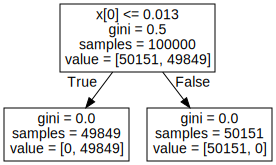

In [ ]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG

graph = Source( tree.export_graphviz(model, out_file=None))
SVG(graph.pipe(format='svg'))


In [ ]:
### Test della rete come Decisore su 3 singoli valori a scelta da predire

valore_da_predire = [[-0.3],[0.4],[-0.1]]

# Crea un array NumPy contenente il valore da predire
input_value = np.array([valore_da_predire])

# Ridimensiona l'array per adattarlo al modello (come fatto durante l'addestramento)
input_value = input_value.reshape(3, -1)  # 3 perchè sono 3 valori da predire

# Esegui la predizione
prediction = model.predict(input_value)

# Stampa la predizione
print(prediction)


# Mappatura BPSK:  0-->1    1-->-1 => un numero negativo dà True, un positivo dà False

[ True False  True]


utilizziamo la rete come Decisore nella Simulazione con metodo Monte-Carlo

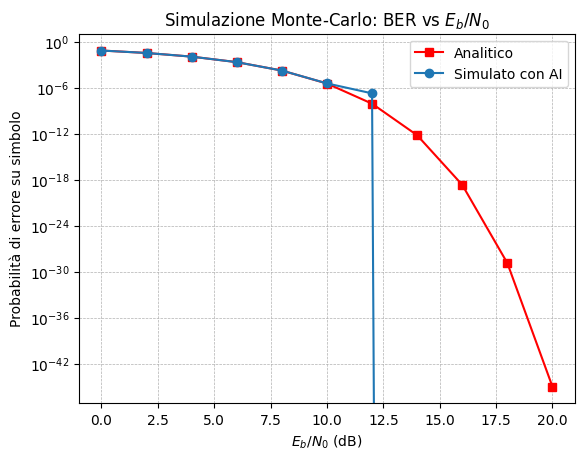

In [ ]:

# Parametri
P_e = np.zeros(len(Eb_N0))  # Inizializzazione della probabilità di errore a 0 = 11 elementi
num_prove = int(1e2)            # Numero di prove = 100

# Simulazione Monte-Carlo
# testa 100 volte la rice-trasmissione per ognuno degli 11 Eb_N0
for num in range(int(num_prove)):
    for p in range(len(Eb_N0)):

        # Trasmettitore
        b_seq = (np.random.rand(int(K))> soglia)  # Genera sequenza binaria da 100mila bit: (<0.5)-->False    (>0.5)-->True
        xi_seq = (-1) ** b_seq                          # Mappatura BPSK:  False=0-->1    True=1-->-1
        sig = A[p] * np.sqrt(T) * xi_seq                # Segnale trasmesso: 1 segnale lungo 100mila

        # AWGN (Additive White Gaussian Noise)
        noise = np.sqrt(N0 / 2) * np.random.randn(int(K))  # Rumore gaussiano
        sig_rx = sig + noise                               # Segnale ricevuto

        # Ricevitore
        b_seq_hat = (model.predict(sig_rx.reshape(100000, -1)))                 # Decisione del ricevitore: dato che l'output è -1 se <0 e 1 se >0, allora deve restituire True quando è -1 e False quando è 1

        # Calcolo della probabilità d'errore sul bit (BER)
        P_e[p] += np.sum(b_seq != b_seq_hat) / K # Memorizzo il BER per ogni Eb_N0
        #es) alla 100esima prova, P_e[0] conterrà la somma di 100 BER ottenute dalle simulazioni ad 1dB



# Calcolo BER medio su tutte le 100 prove
P_e = P_e / num_prove # Divido ciascun elemento di P_e[] per 100
#così avrò 11 elementi che rappresentano la BER media su 100 prove per quella specifica Eb_N0
#es) in P_e[10] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=100 cioè 20dB
#es) in P_e[5] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=10 cioè 10dB


# Calcolo della probabilità teorica
P_e_theoretical = 0.5 * erfc(np.sqrt(Eb / N0))



# Plot dei risultati
plt.figure()
plt.semilogy(Eb_N0_dB, P_e_theoretical, '-sr', label='Analitico')  # Risultati teorici
plt.semilogy(Eb_N0_dB, P_e, '-o', label='Simulato con AI')  # Risultati simulati
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('Probabilità di errore su simbolo') # in questo caso simbolo=bit
plt.legend()
plt.title('Simulazione Monte-Carlo: BER vs $E_b/N_0$')
plt.show()

# La simulazione si interrompe perché non riesce più a trovare errori: numero di prove insufficiente

link utili:


*  Tutorial DecisionTreeClassifier: https://www.youtube.com/watch?v=7eh4d6sabA0&ab_channel=ProgrammingwithMosh
*   Visualizzazione DecisionTreeClassifier: https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
*  Addestramento DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit





# 5. Decisore con Intelligenza Artificiale: Stochastic Gradient Descent Classifier

rispetto ad un DecisionTreeClassifier ho il vantaggio di poter addestrare la rete su più epoche e quindi rendere il modello più robusto. Ogni epoca è rappresentata da un contrasto di energia sempre crescente

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

### Costellazione
b_seq = np.random.rand(int(K)) > soglia  # genera 100mila numeri casuali uniformemente distribuiti tra 0 e 1
xi_seq = (-1) ** b_seq                   # Mappatura BPSK:  0-->1    1-->-1
noise = np.sqrt(N0 / 2) * np.random.randn(int(K))  # Rumore gaussiano


# Inizializzazione del modello con warm_start=True
clf = SGDClassifier(loss="log_loss", max_iter=1, warm_start=True, random_state=42)

for p in range(len(Eb_N0)):  # Simula 11 epoche

  sig = A[p] * np.sqrt(T) * xi_seq  # Segnale trasmesso = 100mila elementi (la dipendenza da Eb_N0 sta nella A)
  sig_rx = sig + noise              # Segnale ricevuto = 100mila elementi: ciascun bit è stato affetto da un AWGN


  ### Addestramento della rete

  # dati di input
  X = sig_rx.reshape(100000, -1)

  # dati che vorrei che il modello imparasse a dare in output
  Y = b_seq.reshape(100000, -1)


  clf.fit(X, Y)  # Addestra ulteriormente sul dataset intero
  y_pred = clf.predict(X)
  print(f"Epoca {p + 1}: Accuracy = {accuracy_score(Y, y_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local

Epoca 1: Accuracy = 0.9188
Epoca 2: Accuracy = 0.96258
Epoca 3: Accuracy = 0.98754
Epoca 4: Accuracy = 0.99754
Epoca 5: Accuracy = 0.99981
Epoca 6: Accuracy = 0.99999
Epoca 7: Accuracy = 1.0
Epoca 8: Accuracy = 1.0
Epoca 9: Accuracy = 1.0
Epoca 10: Accuracy = 1.0
Epoca 11: Accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local

In [ ]:
### Test della rete come Decisore su 3 singoli valori a scelta da predire

valore_da_predire = [[-0.3],[0.4],[-0.1]]

# Crea un array NumPy contenente il valore da predire
input_value = np.array([valore_da_predire])

# Ridimensiona l'array per adattarlo al modello (come fatto durante l'addestramento)
input_value = input_value.reshape(3, -1)  # 3 perchè sono 3 valori da predire

# Esegui la predizione
prediction = clf.predict(input_value)

# Stampa la predizione
print(prediction)


# Mappatura BPSK:  0-->1    1-->-1 => un numero negativo dà True, un positivo dà False

[ True False  True]


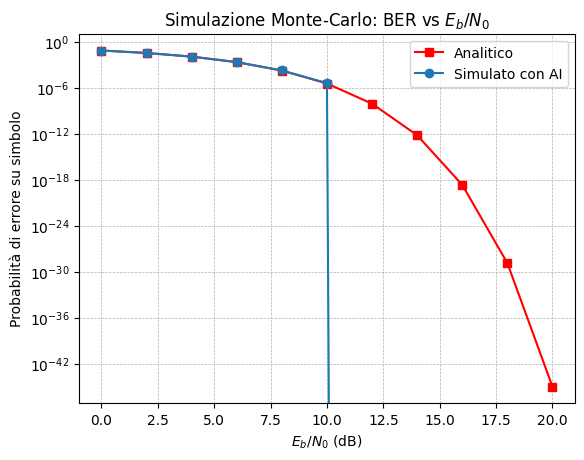

In [ ]:

# Parametri
P_e = np.zeros(len(Eb_N0))  # Inizializzazione della probabilità di errore a 0 = 11 elementi
num_prove = int(1e2)            # Numero di prove = 100

# Simulazione Monte-Carlo
# testa 100 volte la rice-trasmissione per ognuno degli 11 Eb_N0
for num in range(int(num_prove)):
    for p in range(len(Eb_N0)):

        # Trasmettitore
        b_seq = (np.random.rand(int(K))> soglia)  # Genera sequenza binaria da 100mila bit: (<0.5)-->False    (>0.5)-->True
        xi_seq = (-1) ** b_seq                          # Mappatura BPSK:  False=0-->1    True=1-->-1
        sig = A[p] * np.sqrt(T) * xi_seq                # Segnale trasmesso: 1 segnale lungo 100mila

        # AWGN (Additive White Gaussian Noise)
        noise = np.sqrt(N0 / 2) * np.random.randn(int(K))  # Rumore gaussiano
        sig_rx = sig + noise                               # Segnale ricevuto

        # Ricevitore
        b_seq_hat = (clf.predict(sig_rx.reshape(100000, -1)))                 # Decisione del ricevitore: dato che l'output è -1 se <0 e 1 se >0, allora deve restituire True quando è -1 e False quando è 1

        # Calcolo della probabilità d'errore sul bit (BER)
        P_e[p] += np.sum(b_seq != b_seq_hat) / K # Memorizzo il BER per ogni Eb_N0
        #es) alla 100esima prova, P_e[0] conterrà la somma di 100 BER ottenute dalle simulazioni ad 1dB



# Calcolo BER medio su tutte le 100 prove
P_e = P_e / num_prove # Divido ciascun elemento di P_e[] per 100
#così avrò 11 elementi che rappresentano la BER media su 100 prove per quella specifica Eb_N0
#es) in P_e[10] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=100 cioè 20dB
#es) in P_e[5] avrò la BER media ottenuta durante le 100 prove di un rice-trasmettitore con un contrasto di energia di Eb_N0=10 cioè 10dB


# Calcolo della probabilità teorica
P_e_theoretical = 0.5 * erfc(np.sqrt(Eb / N0))



# Plot dei risultati
plt.figure()
plt.semilogy(Eb_N0_dB, P_e_theoretical, '-sr', label='Analitico')  # Risultati teorici
plt.semilogy(Eb_N0_dB, P_e, '-o', label='Simulato con AI')  # Risultati simulati
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('Probabilità di errore su simbolo') # in questo caso simbolo=bit
plt.legend()
plt.title('Simulazione Monte-Carlo: BER vs $E_b/N_0$')
plt.show()

# La simulazione si interrompe perché non riesce più a trovare errori: numero di prove insufficiente

link utili:


*   visualizzare un SGD: https://www.youtube.com/watch?v=_YPScrckx28&ab_channel=VisuallyExplained
*   perchè un SGD funziona bene: https://www.youtube.com/watch?v=UmathvAKj80&ab_channel=VisuallyExplained

